In [11]:
!pip install scikit-learn

In [12]:
#Importing Required Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


In [14]:
print(df.shape)
print(df.columns)
print(df.info())


(4269, 13)
Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269

In [41]:
# Load the Dataset
df = pd.read_csv('loan_approval_dataset.csv')  
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [42]:
# Getting shape of dataset
df.shape 

(4269, 13)

In [43]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [45]:
# Statistical summary of numerical columns
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [47]:
# Checking for Duplicate values
df.duplicated().sum() 

np.int64(0)

In [48]:
# Dropping rows with null values
df.dropna(inplace=True)

In [49]:
#Removing Blank spaces from column names and values
df.columns = df.columns.str.strip()
df['loan_status'] = df['loan_status'].str.strip() 

In [50]:
# Remove spaces 
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x) 

In [54]:
# Data Transformation on Education, Self Employed Coloumns
df['education'] = df['education'].replace({'Not Graduate': 0, 'Graduate': 1}).astype(int)
df['self_employed'] = df['self_employed'].replace({'No': 0, 'Yes': 1}).astype(int)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [55]:
# Data Transformation on Loan Status Coloumns
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


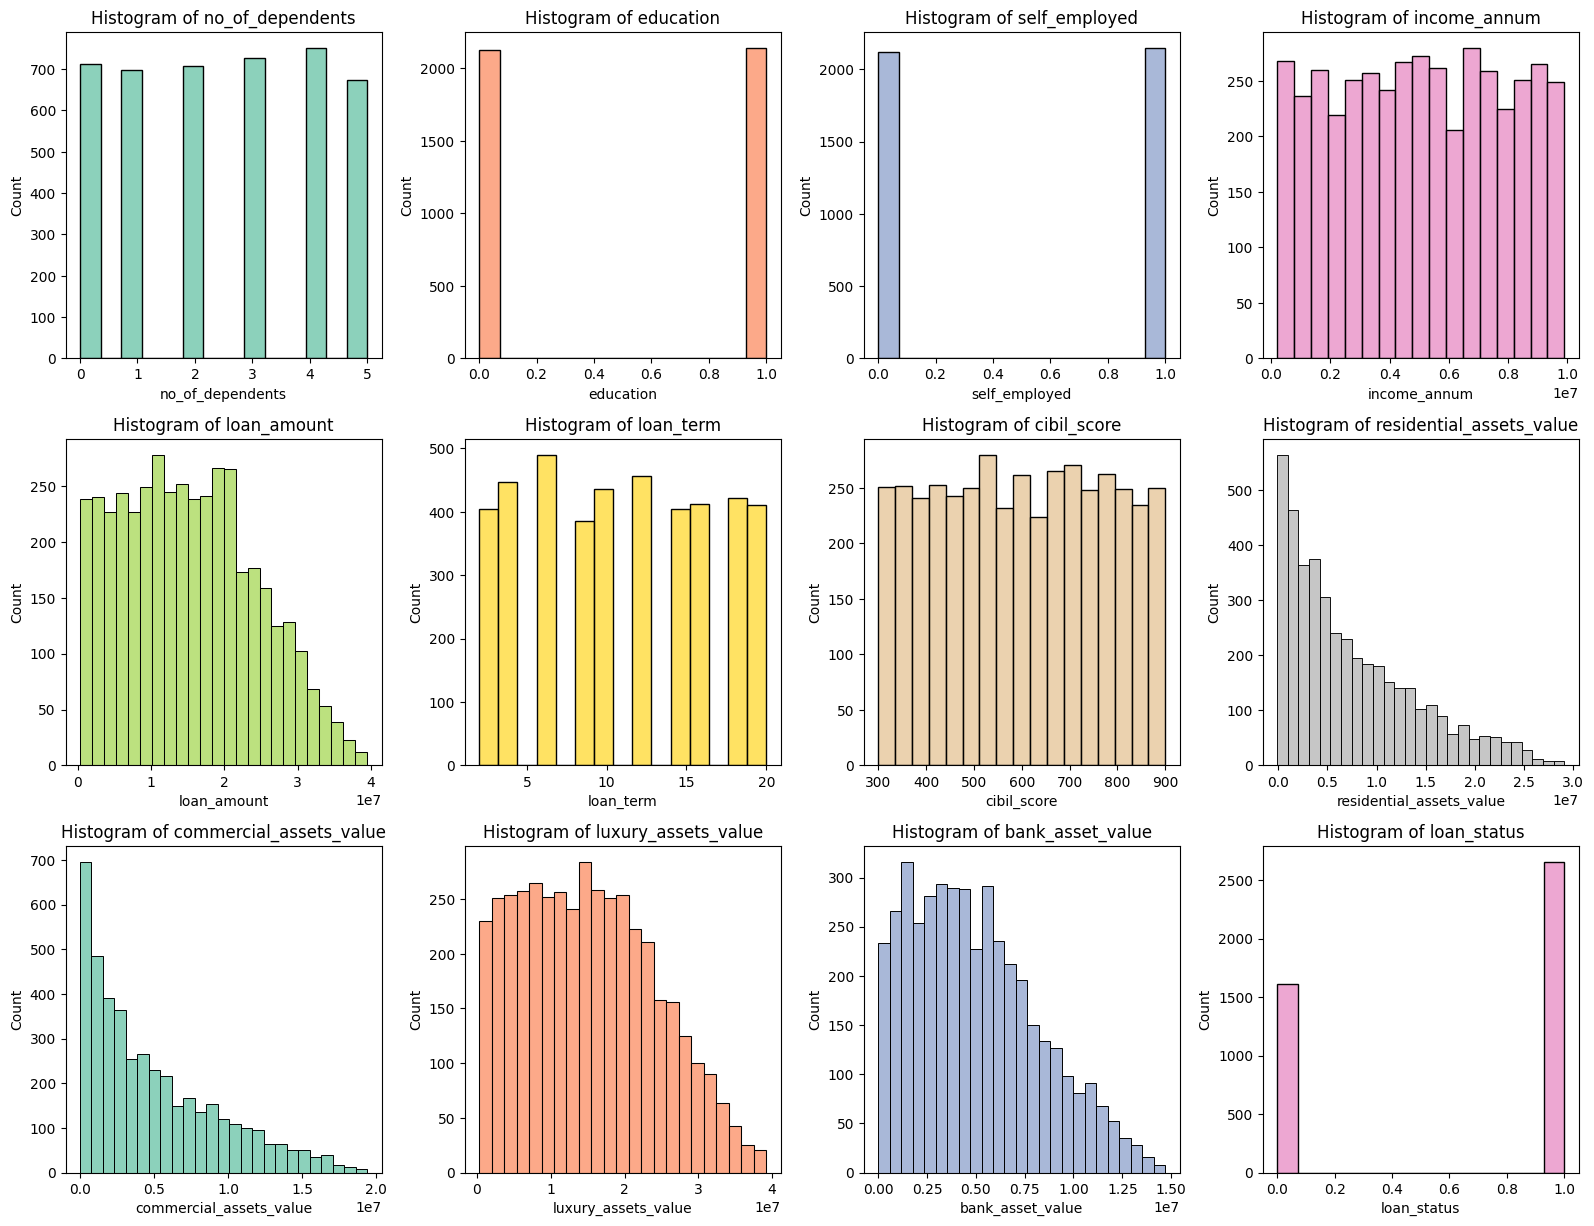

In [58]:
# Univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 16))

numerical_columns = [
    'no_of_dependents', 'education', 'self_employed', 'income_annum',
    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
    'loan_status'
]

# Define a list of distinct colors
colors = sns.color_palette("Set2", len(numerical_columns))

# Plot histogram for each numerical feature
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df, x=col, kde=False, color=colors[i])
    plt.xlabel(col)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


In [61]:
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


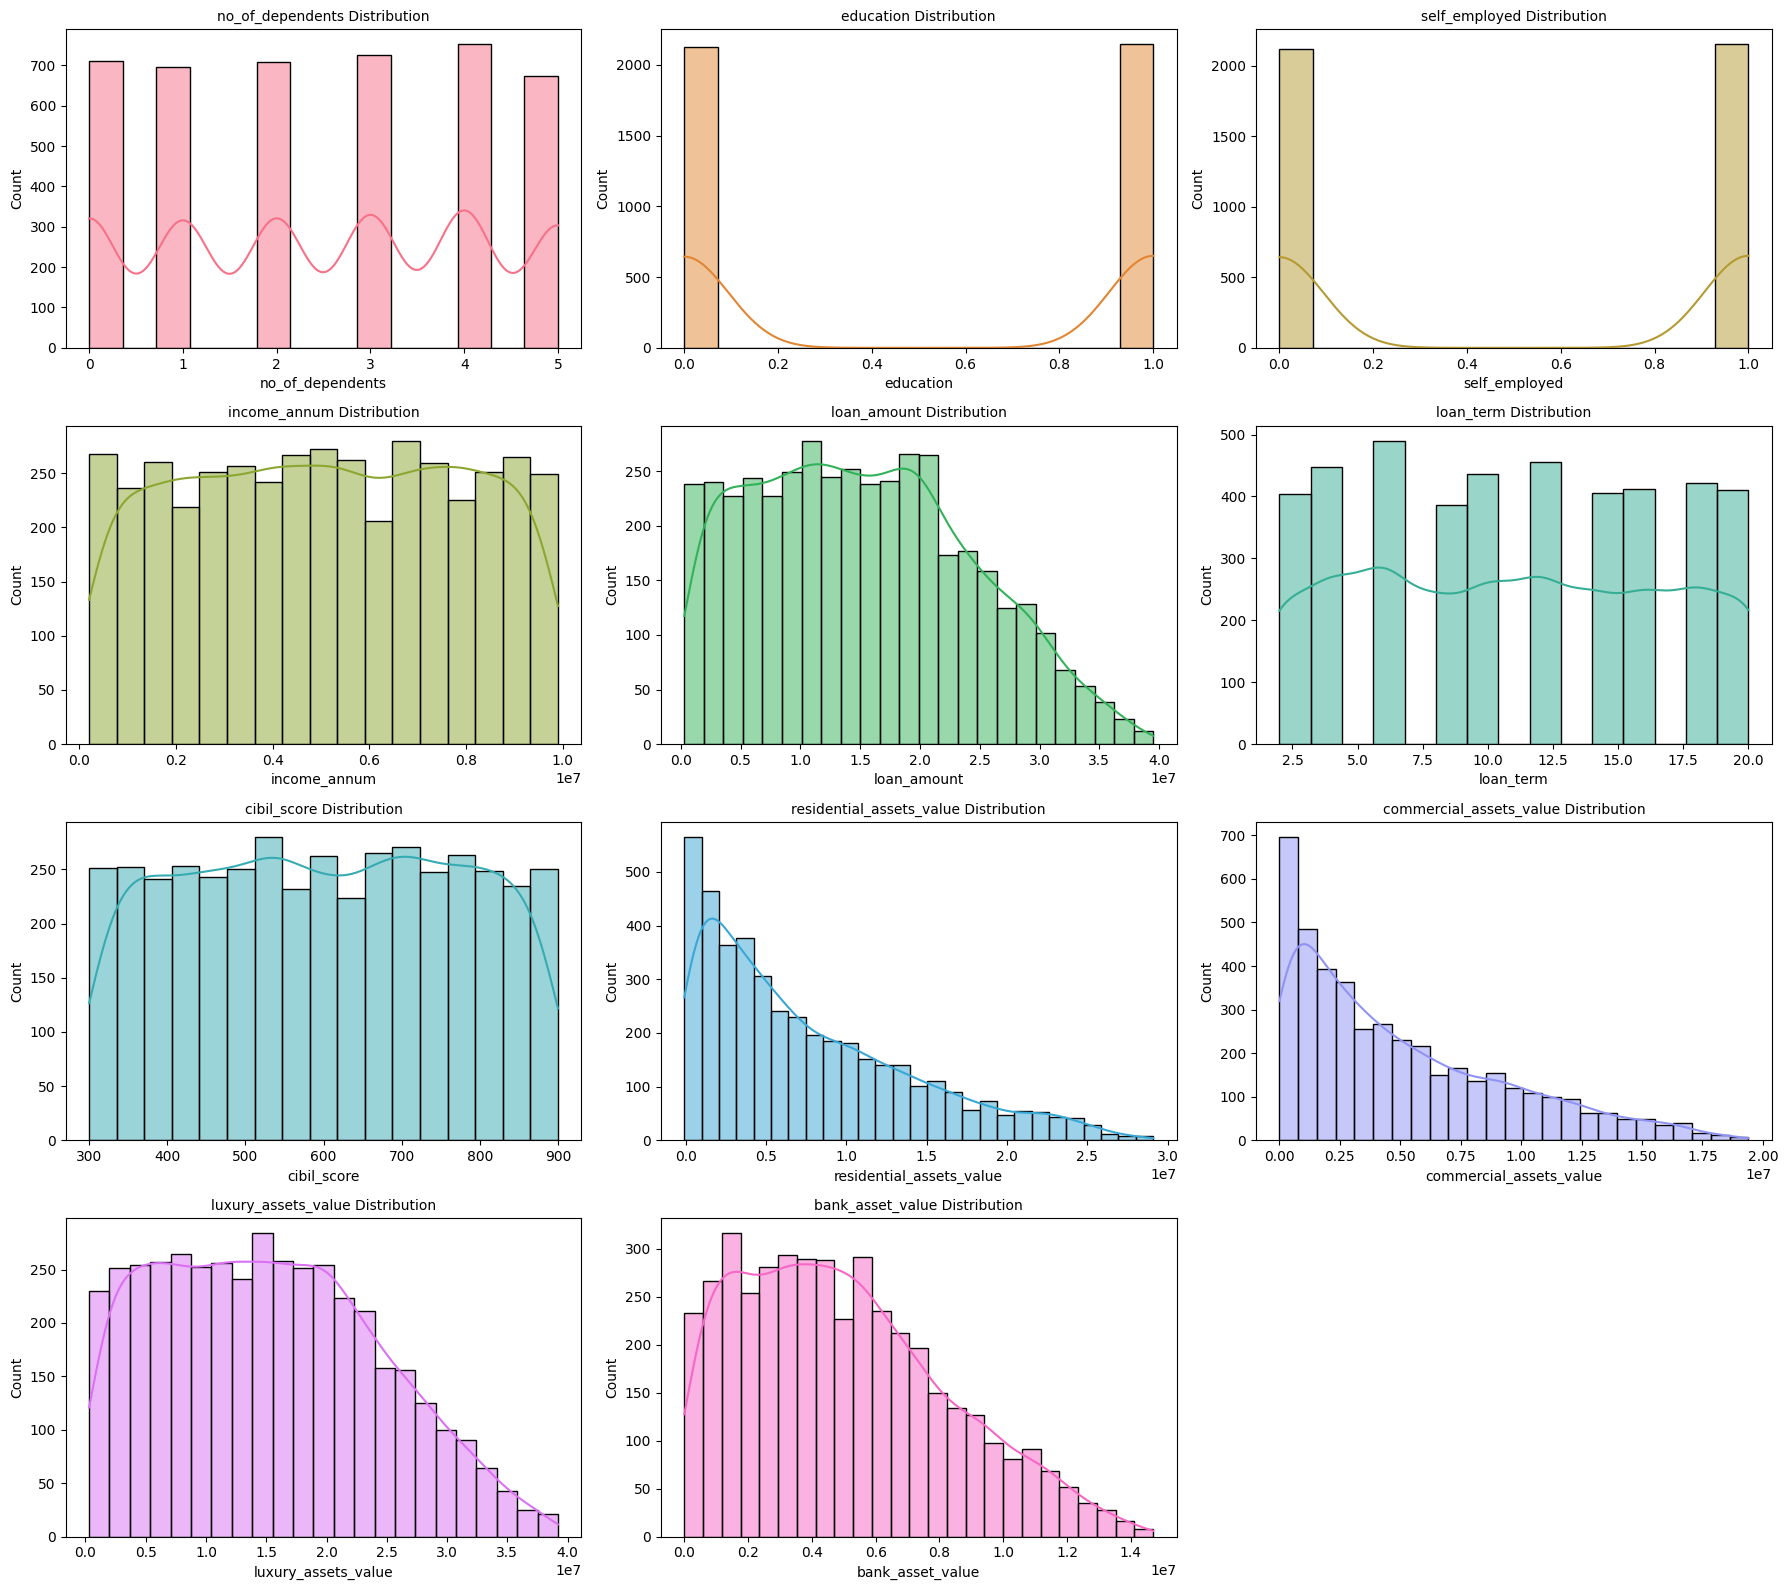

In [64]:
#Bivariate Analysis
numerical_columns = [
    'no_of_dependents', 'education', 'self_employed',
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]

# Define color palette (12 unique colors)
colors = sns.color_palette("husl", len(numerical_columns))

# Create subplots
plt.figure(figsize=(18, 16))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=col, kde=True, color=colors[i - 1], edgecolor='black')
    plt.title(f'{col} Distribution', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()




In [67]:
corr = df[numerical_columns].corr()

In [68]:
mask = np.triu(np.ones_like(corr, dtype=bool))

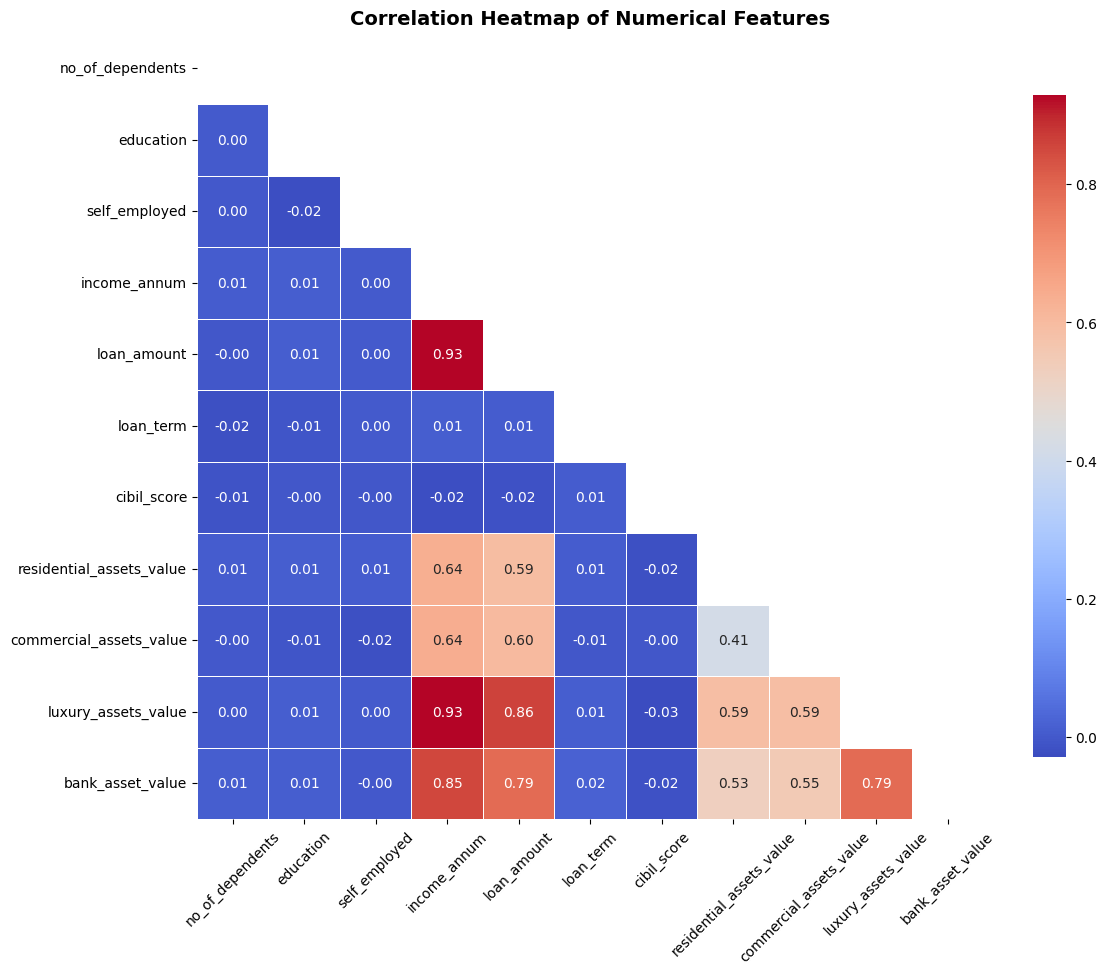

In [69]:
#MultiVariate Analysis
# Plot the heatmap of the correlation between each of the numerical features
# Increase figure size 
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [70]:
#Adding all asset cols into one col.
df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']
#Dropping non required columns
df.drop(columns=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], inplace=True)
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,total_assets
0,1,2,1,0,9600000,29900000,12,778,1,50700000
1,2,0,0,1,4100000,12200000,8,417,0,17000000
2,3,3,1,0,9100000,29700000,20,506,0,57700000
3,4,3,1,0,8200000,30700000,8,467,0,52700000
4,5,5,0,1,9800000,24200000,20,382,0,55000000


In [78]:
# Dropping the unwanted columns(Less Required Cols) 
cols_to_drop = ['loan_id', 'no_of_dependents', 'education', 'self_employed']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

#Removing Target Variable and creating the feature matrix `x`, which will be used for training the model.
x = df.drop(columns=['loan_status'])

# Creating the Target matrix `y`, which contains target variable
y = df['loan_status']

In [79]:
# Divide the dataset into training (80%) and testing (20%) subsets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [81]:
# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model on training data
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Display the first 10 predicted values
print('Predictions:', y_pred[:10])

# Accuracy and classification report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Predictions: [0 1 0 1 1 1 1 0 1 0]
Accuracy Score: 0.9063231850117096
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



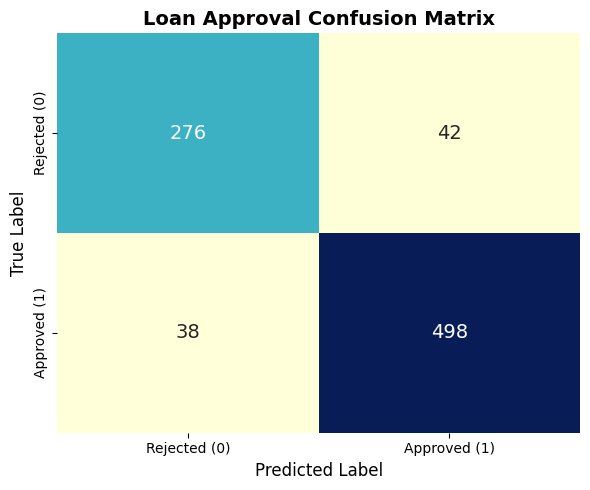

In [82]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'],
            annot_kws={"size": 14})

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Loan Approval Confusion Matrix", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

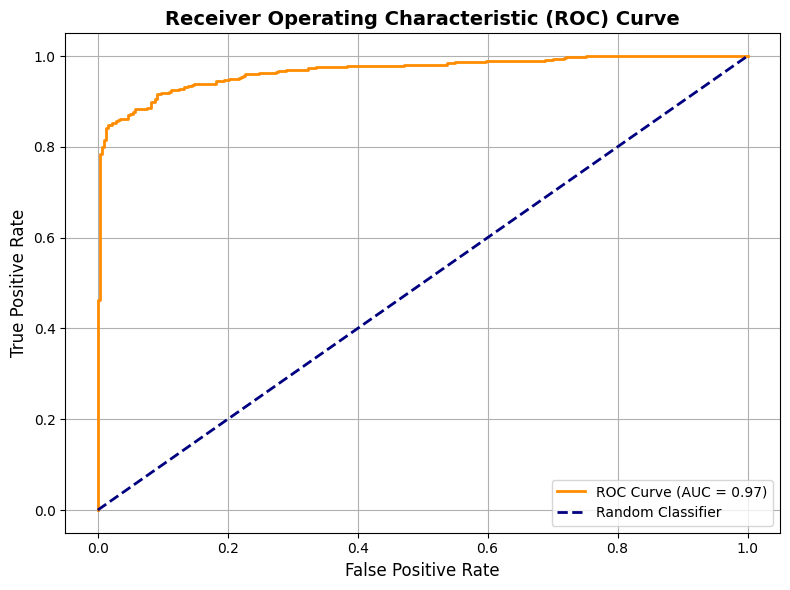

In [83]:
# Get predicted probabilities for class 1
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Axis labels and title
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

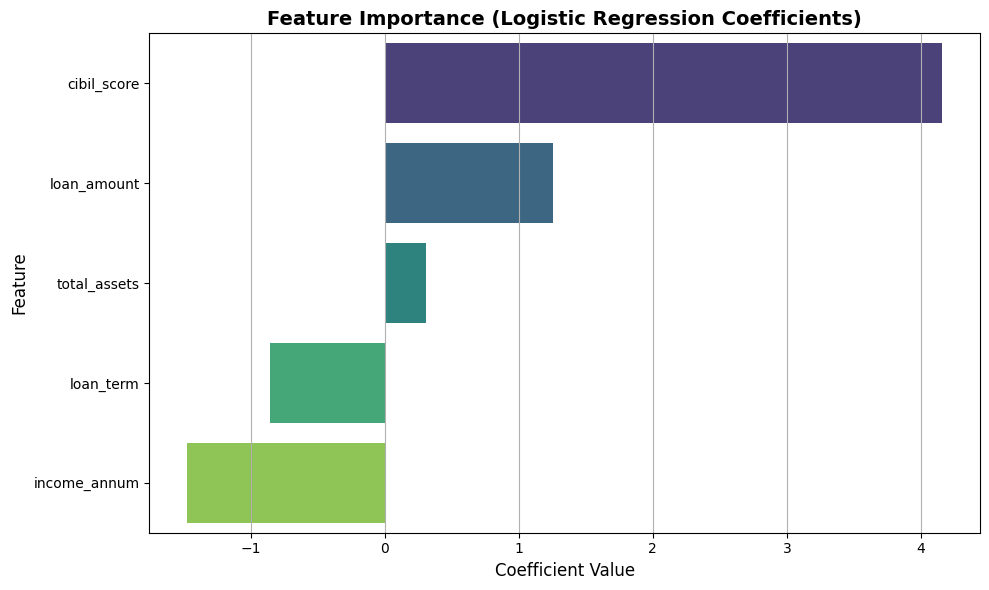

In [86]:
# Get feature importance from Logistic Regression
importance = pd.Series(model.coef_[0], index=x.columns).sort_values(ascending=False)

# Convert to DataFrame for use with `hue`
importance_df = importance.reset_index()
importance_df.columns = ['Feature', 'Importance']

# Plot with seaborn (no warning version)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='viridis',
    dodge=False,
    legend=False  
)

plt.title("Feature Importance (Logistic Regression Coefficients)", fontsize=14, fontweight='bold')
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()